../campaign/aion/turbo.cpu.release-v1.2.9-mzn2024-analysis.csv : Number of erroneous rows:  1
../campaign/aion/turbo.cpu.release-v1.2.9-mzn2024-analysis.csv 63    ../data/mzn-challenge/2024/yumi-dynamic/p_9_GS...
Name: data_file, dtype: object
Number of instances (not solved during flattening): 98
average_preprocessing_time=17.29
median_preprocessing_time=0.97
stddev_preprocessing_time=50.60


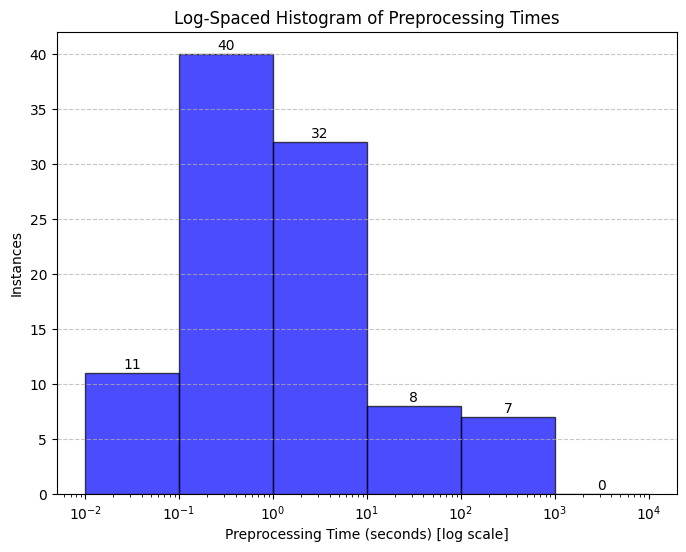

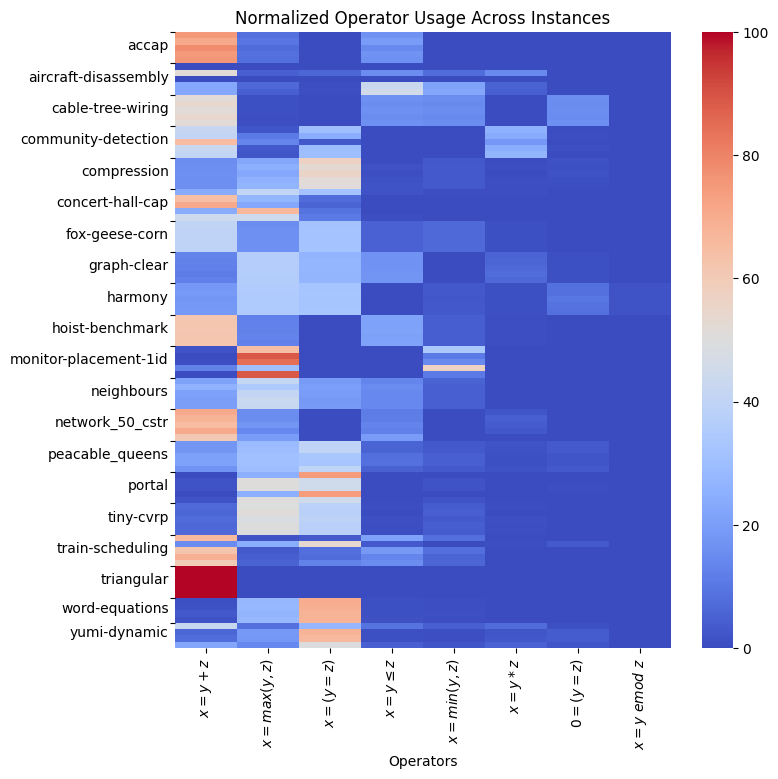

Number of instances not solved during preprocessing: 96
| Problem | Data | #Vars | #Vars (TNF) | #Constraints | #Constraints (TNF) | Preprocessing (sec) |
|----------|------|-------|-------------|--------------|--------------------|---------------------|
| neighbours | neightbours-new-2 | 94.0 | 151.0 (x1.61) | 85.0 | 220.0 (x2.59) | 0.018 |
| hoist-benchmark | PU_3_2_1 | 4402.0 | 4289.0 (x0.97) | 5687.0 | 5807.0 (x1.02) | 0.487 |
| word-equations | word_equations_01_track_140-int | 3027.0 | 4464.0 (x1.47) | 3987.0 | 14089.0 (x3.53) | 1.135 |
| word-equations | word_equations_03_track_31-int | 12271.0 | 21093.0 (x1.72) | 15052.0 | 82325.0 (x5.47) | 32.005 |
| tiny-cvrp | medium_instance_11 | 4610.0 | 6617.0 (x1.44) | 4971.0 | 10995.0 (x2.21) | 0.559 |
| harmony | ode | 4506.0 | 7774.0 (x1.73) | 4187.0 | 21062.0 (x5.03) | 1.34 |
| peacable_queens | pq_n19 | 5181.0 | 16735.0 (x3.23) | 2192.0 | 36868.0 (x16.82) | 8.604 |
| aircraft-disassembly | B737NG-600-04-Anon.json | 22086.0 | 893459.

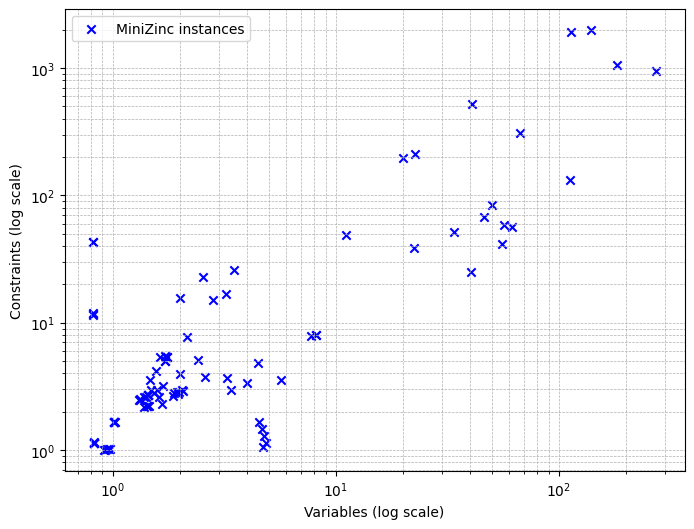

average_vars_increase=115.46
average_cons_increase=256.91
max_vars_increase=2159.65
max_cons_increase=6490.05
median_vars_increase=10.21
median_cons_increase=7.92
stddev_vars_increase=358.67
stddev_cons_increase=999.22
leq_10x_increase=45


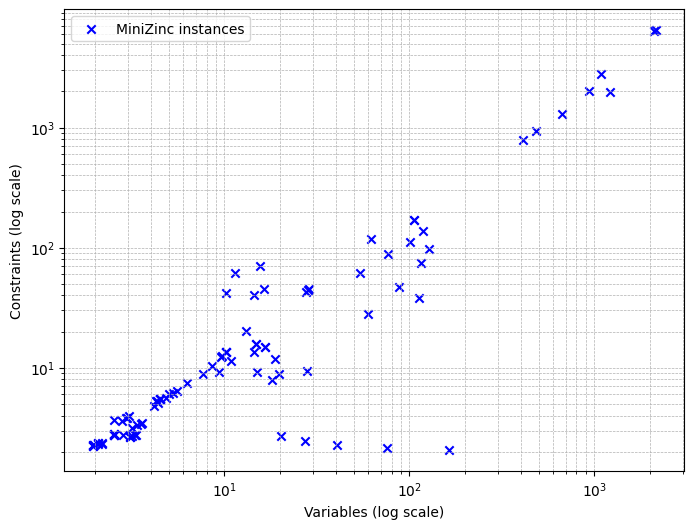

average_vars_increase=64.77
average_cons_increase=152.43
max_vars_increase=1316.34
max_cons_increase=3912.41
median_vars_increase=4.74
median_cons_increase=4.46
stddev_vars_increase=211.97
stddev_cons_increase=602.61
leq_10x_increase=56


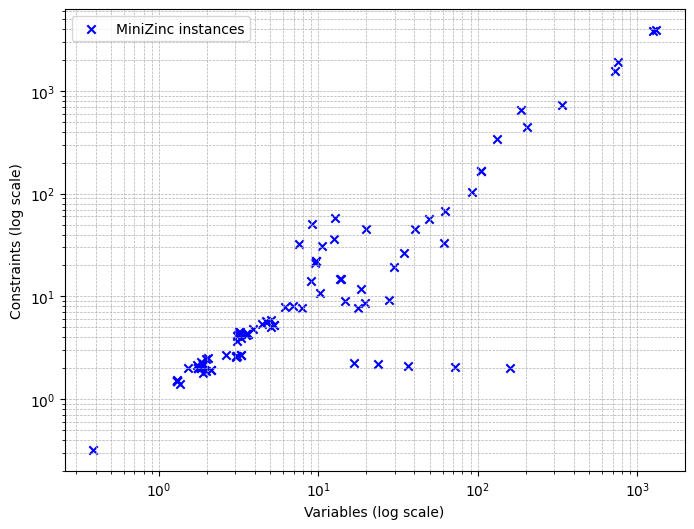

average_vars_increase=6.18
average_cons_increase=1.55
max_vars_increase=128.46
max_cons_increase=3.90
median_vars_increase=2.42
median_cons_increase=1.46
stddev_vars_increase=18.33
stddev_cons_increase=0.75
leq_10x_increase=87


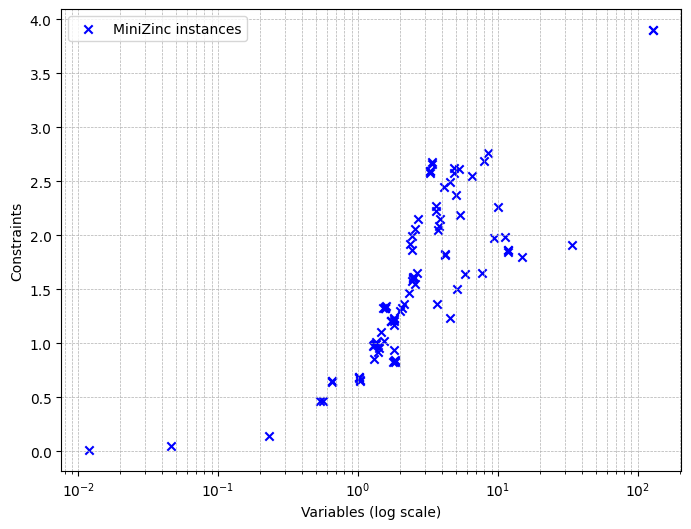

In [9]:
import importlib
import analysiscn
from IPython.display import HTML, display
import pandas as pd

importlib.reload(analysiscn)

pd.options.mode.copy_on_write = True

df = analysiscn.read_experiments([
  "../campaign/aion/turbo.cpu.release-v1.2.9-mzn2024-analysis.csv",
  # "../campaign/helios/turbo.gpu.release-v1.2.8-mzn2024.csv"
])

mzn_challenge = pd.read_csv("../benchmarking/mzn2024.csv")
mzn_challenge['model_data_file'] = mzn_challenge['model'] + ' - ' + mzn_challenge['data_file']
# print(mzn_challenge)
mzn_data = set(mzn_challenge['model_data_file'])
df = df[df['model_data_file'].isin(mzn_data)]

# Remove instances that might have been solved during flattening
df = df[~(df['preprocessing_time'].isna())]

# Print the number of rows
print(f"Number of instances (not solved during flattening): {df.shape[0]}")

analysiscn.preprocessing_time_distribution(df)
# analysiscn.analyse_tnf_per_problem(df, False, 'parsed_variables', 'parsed_constraints', 'variables_after_simplification', 'constraints_after_simplification')
analysiscn.heatmap_operators(df)

df = df[(df['variables_after_simplification'] > 0) & (df['constraints_after_simplification'] > 0)]
print(f"Number of instances not solved during preprocessing: {df.shape[0]}")

choco = analysiscn.read_experiments([
  "../campaign/aion/org.choco.choco-v4.10.18-mzn2024.csv"
])
choco = choco[choco['model_data_file'].isin(mzn_data)]
choco = choco.drop_duplicates(subset='model_data_file', keep='last')
choco.rename(columns={'variables': 'choco_vars', 'constraints': 'choco_cons'}, inplace=True)
df = df.merge(choco[['model_data_file', 'choco_vars', 'choco_cons']], on='model_data_file', how='left')

analysiscn.boxplot_tcn_increase(df, 'choco_vars', 'choco_cons')
analysiscn.boxplot_preprocessing_components(df, ['eliminated_entailed_constraints', 'eliminated_equality_constraints', 'eliminated_constraints_by_icse'])

analysiscn.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'parsed_variables', 'parsed_constraints', True)
analysiscn.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons', 'tnf_variables', 'tnf_constraints')
analysiscn.analyse_tnf_per_problem(df, True, 'choco_vars', 'choco_cons','variables_after_simplification', 'constraints_after_simplification')

analysiscn.analyse_tnf_per_problem(df, False, 'parsed_variables', 'parsed_constraints','variables_after_simplification', 'constraints_after_simplification')
